In [1]:
import warnings
warnings.filterwarnings('ignore')

import os.path as op

import matplotlib.pyplot as plt
from labellines import labelLines

import numpy as np

from scipy.optimize import linprog

We are going to use the funcion ***[linprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html)*** from the scipy library <br>
The constraints of this library are that it can online **minimize** a function and that the inequalities need to be given as **$\leq$**

# Transportation problem

**Objective:** Transport goods from source warehouses to various destination locations at minimum cost

There are 3 different warehouses (m=3) and three distinations (n=3) with their own production and demand respectively:


|              |m1 | m2| m3|
|---           |---|---|---|
|**Production**|300|600|600|

|           |n1 | n2| n3|
|---        |---|---|---|
|**Demand**|150|450|900|

The cost to transport the goods from each warehouse to each destinations is the following: <br>

|       |n1 | n2| n3|
|---    |---|---|---|
| **m1**|  5|  1|  9|
| **m2**|  4|  2|  8|
| **m3**|  8|  7|  2|




In [2]:
m = 3 #Number of warehouses
n = 3 #Number of destinations

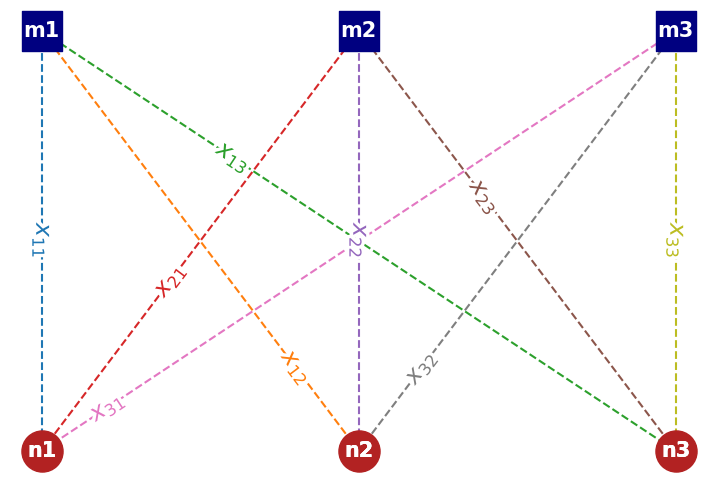

In [3]:
fig, ax = plt.subplots(figsize = [9, 6])

xm, ym = range(m), np.full([m],1)
xn, yn = range(n), np.full([n], 0)

ax.scatter(xm, ym, marker = 's', s=800, color = 'navy')
ax.scatter(xn, yn, marker = '.', s=3500, color = 'firebrick')

for mi in range(m):
    ax.text(xm[mi], ym[mi], 'm' + str(mi+1), color = 'white', fontsize = 15, verticalalignment='center', horizontalalignment='center', fontweight = 'bold')
    for ni in range(n):
        ax.text(xn[ni], yn[ni], 'n' + str(ni+1), color = 'white', fontsize = 15, verticalalignment='center', horizontalalignment='center', fontweight = 'bold')
        ax.plot([xm[mi], xn[ni]], [ym[mi], yn[ni]],linestyle='dashed', zorder=-1, label = '$x_{' + str(mi+1) + str(ni+1) + '}$')

ax.axis('off')
labelLines(plt.gca().get_lines(), zorder=3, fontsize = 17, fontweight = 'bold');


1) **Define the objective function**

The objective function has to minimize the total shipping costs: <br>

$$Z=\sum_{i=1}^m\sum_{j=1}^n(c_{ij} * x_{ij})$$ <br> 

where $x_{ij}$ is the amount of goods transported and $c_{ij}$ is the transportation cost associated per unit.



Coefficients $c_{ij}$:

In [4]:
obj = [5, 1, 9, 4, 2, 8, 8, 7, 2]

2) **Define the equalities**

Structure: $x_{11} + x_{12} + x_{13} + x_{21} + x_{22} + x_{23} + x_{31} + x_{32} + x_{33}$

In [5]:
#Left side of the equality
lhs_eq = [[1,1,1,0,0,0,0,0,0], #supply from warehouse A = 300
          [0,0,0,1,1,1,0,0,0], #supply from warehouse B = 600
          [0,0,0,0,0,0,1,1,1], #supply from warehouse C = 600
          
          [1,0,0,1,0,0,1,0,0], #arrives at destination 1
          [0,1,0,0,1,0,0,1,0], #arrives at destination 2
          [0,0,1,0,0,1,0,0,1], #arrives at destination 3
        ]  

#Right of the equality
rhs_eq = [300, #supply from warehouse A = 300 
          600, #supply from warehouse B = 600
          600, #supply from warehouse C = 600
          150, #arrives at destination 1
          450, #arrives at destination 2
          900] #arrives at destination 3

3) **Define the bounds**

The goos transported need to be positive $x_{ij}\geq 0$ for $i=1,...,n;$ and $j=1,...,m$ 

In [6]:
bnd = [(0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf)]  # Bounds of y

4) **Optimize**

Apply the scipy ***linprog*** function

In [7]:
opt = linprog(c=obj, A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd)

In [8]:
opt

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 4800.0
              x: [ 0.000e+00  3.000e+02  0.000e+00  1.500e+02  1.500e+02
                   3.000e+02  0.000e+00  0.000e+00  6.000e+02]
            nit: 5
          lower:  residual: [ 0.000e+00  3.000e+02  0.000e+00  1.500e+02
                              1.500e+02  3.000e+02  0.000e+00  0.000e+00
                              6.000e+02]
                 marginals: [ 2.000e+00  0.000e+00  2.000e+00  0.000e+00
                              0.000e+00  0.000e+00  1.000e+01  1.100e+01
                              0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.

---

**Plot result**

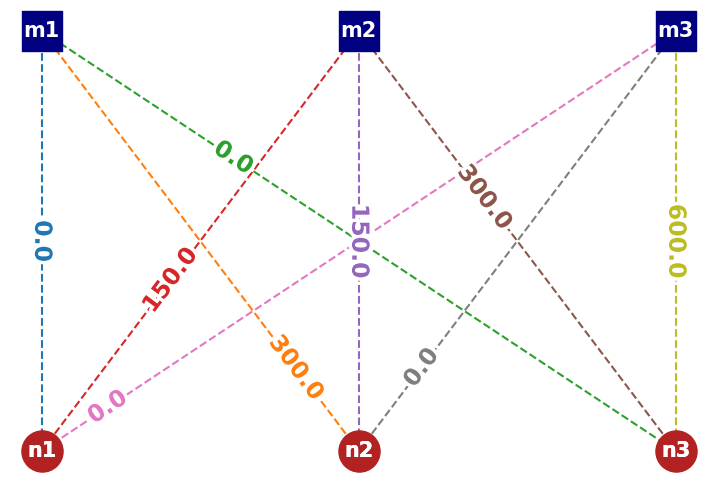

In [9]:
fig, ax = plt.subplots(figsize = [9, 6])

xm, ym = range(m), np.full([m],1)
xn, yn = range(n), np.full([n], 0)

ax.scatter(xm, ym, marker = 's', s=800, color = 'navy')
ax.scatter(xn, yn, marker = '.', s=3500, color = 'firebrick')

cont=0
for mi in range(m):
    ax.text(xm[mi], ym[mi], 'm' + str(mi+1), color = 'white', fontsize = 15, verticalalignment='center', horizontalalignment='center', fontweight = 'bold')
    for ni in range(n):
        ax.text(xn[ni], yn[ni], 'n' + str(ni+1), color = 'white', fontsize = 15, verticalalignment='center', horizontalalignment='center', fontweight = 'bold')
        ax.plot([xm[mi], xn[ni]], [ym[mi], yn[ni]],linestyle='dashed', zorder=-1, label = str(opt.x[cont]))
        cont+=1

ax.axis('off')
labelLines(plt.gca().get_lines(), zorder=3, fontsize = 17, fontweight = 'bold');
